# Setup

In [25]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot
import plotly.express as px

In [3]:
import plotly
print(plotly.__version__)

5.10.0


In [108]:
categories = ['Environment', 'Social', 'Governance']

subcategories_env_pos = ['Climate Impact', 'Biodiversity and Environmental Footprint', 'Waste and Emission Management', 'Environmental Opportunities ','Waste and Emissions Management ']
subcategories_env_neg = ['Greenwashing','Environmental Crime', 'Biodiversity and Environmental Footprint','Climate Impact','Waste and Emission Management','Waste and Emissions Management ']
subcategories_env = subcategories_env_pos + subcategories_env_neg
subcategories_env = list(dict.fromkeys(subcategories_env))

subcategories_soc_pos = ['Human Capital ','Workplace and Product Safety','Cybersecurity','Diversity and Inclusion','Public Relations','Community Opportunities']
subcategories_soc_neg = ['Human Capital ','Workplace and Product Safety','Cybersecurity','Discrimination','Controversial Profile']
subcategories_soc = subcategories_soc_pos + subcategories_soc_neg
subcategories_soc = list(dict.fromkeys(subcategories_soc))

subcategories_gov_pos_neg = ['Business Ethics and Transparency','Board Engagement','Legal Compliance','Product Stewardship']

subcategories = ['Climate Impact', 'Biodiversity and Environmental Footprint', 'Waste and Emission Management', 'Human Capital ', 'Environmental Opportunities ', 'Waste and Emissions Management ', 'Diversity and Inclusion', 'Workplace and Product Safety', 'Environmental Crime', 'Legal Compliance', 'Business Ethics and Transparency', 'Product Stewardship']

# Get data

In [383]:
all_data = pd.read_csv('../Data/posts_esg.csv')
print(len(all_data))
all_data['urn'] = all_data['urn'].astype('int64') 

all_data.head()

4983


,urn,ts,company,numLikes,numComments,text,Environment,Positive,Climate Impact,Biodiversity and Environmental Footprint,...,Human Capital,Environmental Opportunities,Waste and Emission Management,Diversity and Inclusion,Workplace and Product Safety,Environmental Crime,Governance,Legal Compliance,Business Ethics and Transparency,Product Stewardship
0,6988830000000000000,20/10/2022 12:00,boeing,1416,31,#TBT As production for the iconic 747 comes to...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6988640000000000000,19/10/2022 23:38,boeing,465,4,The Boeing Bonsai Club was formed in the late ...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6988590000000000000,19/10/2022 20:00,boeing,440,12,Are you looking for a unique career in aerospa...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6988220000000000000,18/10/2022 19:30,boeing,218,2,Let’s get digital! \r\n\r\nOur ForeFlight inte...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6988200000000000000,18/10/2022 18:30,boeing,595,4,This week we will be at the National Business ...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [384]:
all_data.columns

Index(['urn', 'ts', 'company', 'numLikes', 'numComments', 'text',
       'Environment', 'Positive', 'Climate Impact',
       'Biodiversity and Environmental Footprint', 'Negative',
       'Waste and Emissions Management ', 'Social', 'Human Capital ',
       'Environmental Opportunities ', 'Waste and Emission Management',
       'Diversity and Inclusion', 'Workplace and Product Safety',
       'Environmental Crime', 'Governance', 'Legal Compliance',
       'Business Ethics and Transparency', 'Product Stewardship'],
      dtype='object')

In [385]:
all_data['company'].unique()

array(['boeing', 'jpmorgan', 'merck', 'mckesson', 'albertsons',
       'jcpenney', 'metlife', 'pepsico', 'wellsfargo', 'autonation',
       'oracle', 'xerox', 'exelon', 'gap', 'antheminc', 'textron',
       'unionpacific', 'staples', 'humana', 'aflac', 'iheartmedia',
       'aramark', 'avaya', 'gannett', 'saicinc', 'nordstrom', 'autozone',
       'insperity', 'jabil', 'amgen', 'amd', 'steelcase', 'kiewit',
       'thrivent', 'spherion', 'petsmart', 'unilever', 'ecolab',
       'tellabs', 'cunamutualgroup', 'synovus', 'flowserve', 'fiserv',
       'kennametal', 'novglobal', 'paychex', 'bankofhawaii', 'earthlink',
       'ceridian', 'tektronix'], dtype=object)

# Overall post analysis

In [386]:
option = 'unilever'

In [387]:
data = all_data.loc[all_data['company'] == option].copy()
data = data.reset_index()

num_esg_pos = data['Positive'].value_counts(dropna=True).sum()
num_esg_neg = data['Negative'].value_counts(dropna=True).sum()

cat_counts = dict()
cat_scores = dict()

data['Environmental subcategories'] = 0 
data['Social subcategories'] = 0 
data['Governance subcategories'] = 0 


score_env=0
score_soc=0
score_gov=0

for index, col in enumerate(data):
    if index < (len(data)-1):
        if pd.isna(data.at[index, col]):
            continue 
        else:
            if col in subcategories_env:
                score_env += data.at[index, col] 
            elif col in subcategories_soc:
                score_soc += data.at[index, col]
            elif col in subcategories_gov_pos_neg:
                score_gov += data.at[index, col]
            
            data.at[index, 'Environmental subcategories'] = score_env
            data.at[index, 'Social subcategories'] = score_soc
            data.at[index,'Governance subcategories'] = score_gov
    else: 
        break

for col in categories:
    cat_counts[col] = data[col].value_counts(dropna=True).sum()
    score = data[col].dropna().mean()
    if pd.isna(score):
        score = 0
    cat_scores[col] = score

cat_counts_df = pd.DataFrame({'Category': list(cat_counts.keys()), 'Counts': list(cat_counts.values())})
cat_scores_df = pd.DataFrame({'Category': list(cat_scores.keys()), 'Scores Sum': list(cat_scores.values())})

cat_scores_df = pd.DataFrame({'Category': list(cat_scores.keys()), 'Scores Sum': list(cat_scores.values())})
cat_scores_df = pd.DataFrame({'Category': list(cat_scores.keys()), 'Scores Sum': list(cat_scores.values())})


subcat_counts = dict()
subcat_scores = dict()
subcat_cat = []

for col in subcategories:
    subcat_counts[col] = data[col].value_counts(dropna=True).sum()
    score = data[col].dropna().mean()
    if pd.isna(score):
        score = 0
    subcat_scores[col] = score

for col in subcat_counts:
    if col in subcategories_env:
        subcat_cat.append('Environmental')
    elif col in subcategories_soc:
        subcat_cat.append('Social')
    elif col in subcategories_gov_pos_neg:
        subcat_cat.append('Governance')  
        
cat_individual_scores = dict()

# data['Environmental category']= data[subcategories_env].sum(axis=1)
# data['Social category']= data[subcategories_soc].sum(axis=1)
# data['Governance category']= data[subcategories_gov_pos_neg].sum(axis=1)

data['ESG total score'] = data[categories].sum(axis=1)

subcat_counts_df = pd.DataFrame({'Category': list(subcat_counts.keys()), 'Counts': list(subcat_counts.values()), 'Main category': subcat_cat})
subcat_scores_df = pd.DataFrame({'Category': list(subcat_scores.keys()), 'Scores Sum': list(subcat_scores.values()),'Main category': subcat_cat})

subcat_counts_df = subcat_counts_df.sort_values(by='Main category')
subcat_scores_df = subcat_scores_df.sort_values(by='Main category')

avg_likes = data['numLikes'].mean()
avg_comments = data['numComments'].mean()


def extract_hashtags(text):
    hashtag_list = []
     
    # splitting the text into words
    for word in text.split():
        if word[0] == '#':
            hashtag_list.append(word[1:])
    return hashtag_list

In [388]:
print(avg_likes, avg_comments)

466.56 47.77


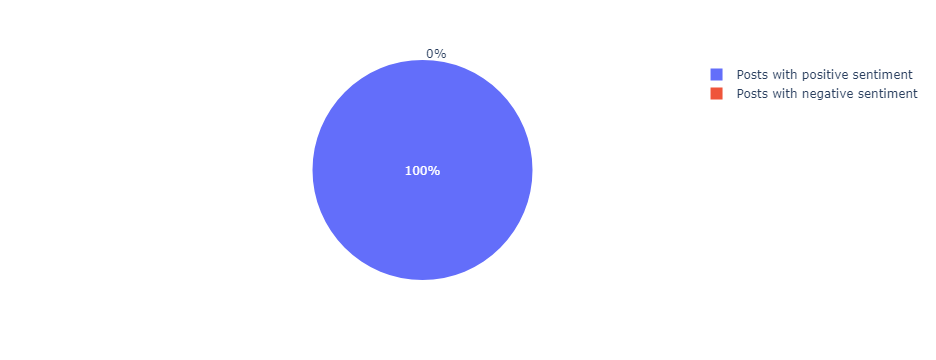

In [389]:
labels = ['Posts with positive sentiment', 'Posts with negative sentiment']
sizes = [num_esg_pos, num_esg_neg]
explode = (0, 0) 

fig = px.pie(values=sizes, names=labels)
fig.show()

<AxesSubplot:xlabel='Category', ylabel='Counts'>

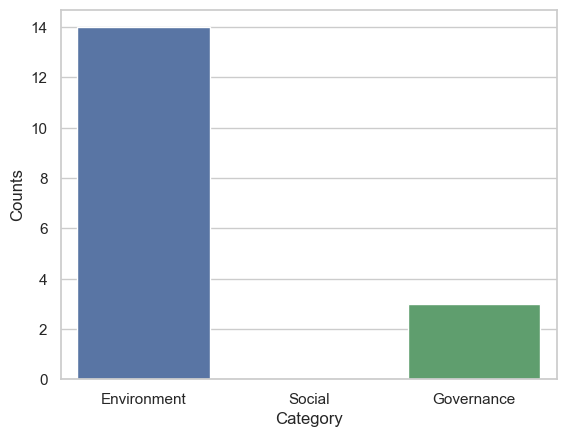

In [390]:
sns.barplot(data=cat_counts_df, x='Category', y='Counts')

<AxesSubplot:xlabel='Category', ylabel='Scores Sum'>

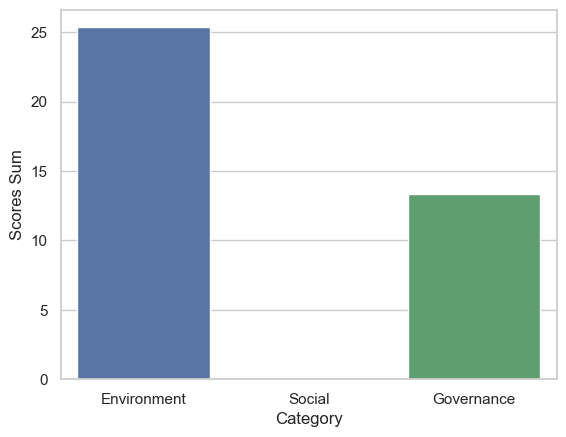

In [391]:
sns.barplot(data=cat_scores_df, x='Category', y='Scores Sum')

<AxesSubplot:xlabel='Counts', ylabel='Category'>

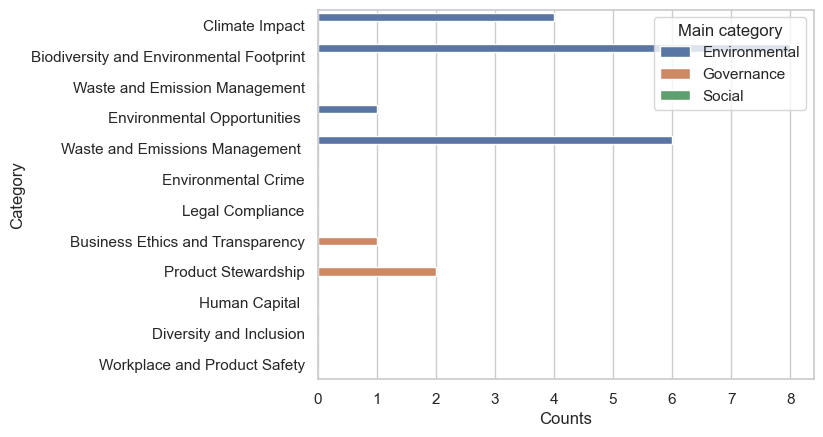

In [392]:
sns.barplot(data=subcat_counts_df, x='Counts', y='Category', orient='h', hue = 'Main category')

<AxesSubplot:xlabel='Scores Sum', ylabel='Category'>

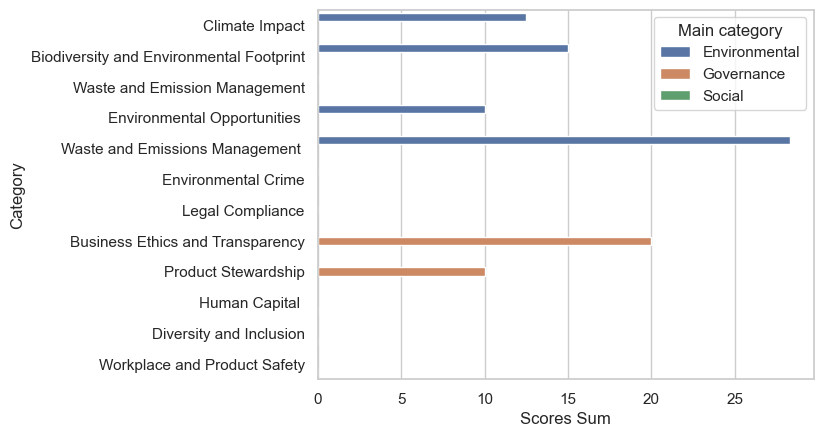

In [393]:
sns.barplot(data=subcat_scores_df, x='Scores Sum', y='Category', orient='h', hue = 'Main category')

In [394]:
subcat_scores_df = subcat_scores_df.reset_index()

<AxesSubplot:xlabel='Scores Sum', ylabel='Category'>

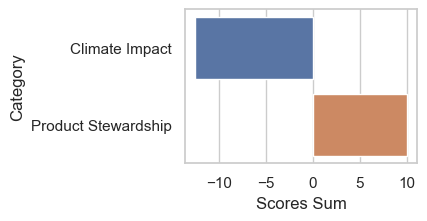

In [395]:
# choose two main categories
subcategory_1 = 'Climate Impact'
subcategory_2 = 'Product Stewardship'
subcategory_1_score = dict()
subcategory_2_score = dict()

# convert one of them to negative
subcategory_1_score[subcategory_1] = subcat_scores_df[subcat_scores_df['Category']==subcategory_1]['Scores Sum'].values[0]*-1
subcategory_2_score[subcategory_2] = subcat_scores_df[subcat_scores_df['Category']==subcategory_2]['Scores Sum'].values[0]

subcategory_1_score.update(subcategory_2_score)
# make df
df_subcategories_1_2 = pd.DataFrame({'Category': list(subcategory_1_score.keys()), 'Scores Sum': list(subcategory_1_score.values())})

# plot
sns.set_theme(style="whitegrid")
fig, ax = pyplot.subplots(figsize=(3,2))
sns.barplot(data=df_subcategories_1_2, x='Scores Sum', y='Category', orient='h')


#make pretty later

[Text(0.5, 1.0, 'Sum of Environmental subcategories per post of company')]

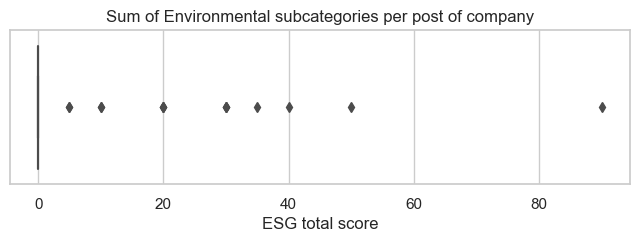

In [396]:
fig, ax = pyplot.subplots(figsize=(8,2))
sns.boxplot(data=data, x='ESG total score').set(title='Sum of Environmental subcategories per post of company')

[Text(0.5, 1.0, 'Sum of ESG main category per post of company')]

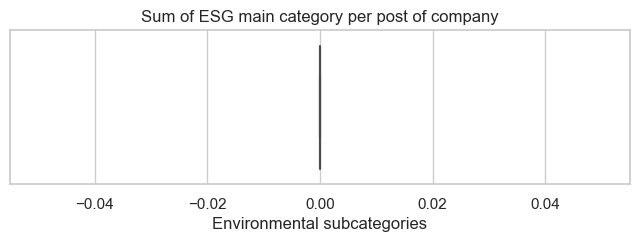

In [397]:
fig, ax = pyplot.subplots(figsize=(8,2))
sns.boxplot(data=data, x='Environmental subcategories').set(title='Sum of ESG main category per post of company')

[Text(0.5, 1.0, 'Sum of Environmental subcategories per post of company')]

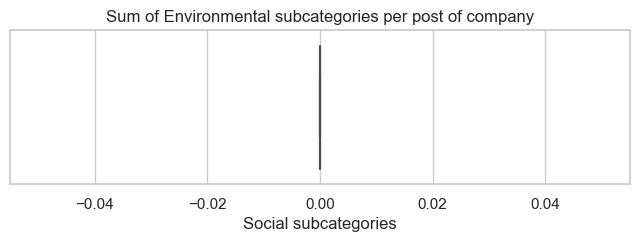

In [398]:
fig, ax = pyplot.subplots(figsize=(8,2))
sns.boxplot(data=data, x='Social subcategories').set(title='Sum of Environmental subcategories per post of company')

[Text(0.5, 1.0, 'Sum of Governance subcategories per post of company')]

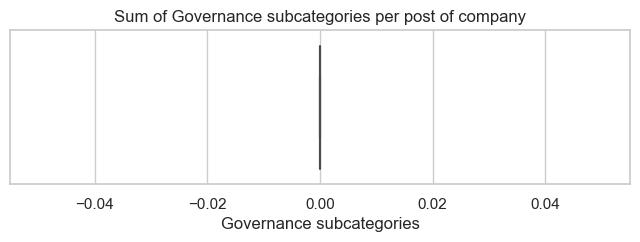

In [399]:
fig, ax = pyplot.subplots(figsize=(8,2))
sns.boxplot(data=data, x='Governance subcategories').set(title='Sum of Governance subcategories per post of company')

# Top 5 Analysis

In [400]:
#show column names
data.columns

Index(['index', 'urn', 'ts', 'company', 'numLikes', 'numComments', 'text',
       'Environment', 'Positive', 'Climate Impact',
       'Biodiversity and Environmental Footprint', 'Negative',
       'Waste and Emissions Management ', 'Social', 'Human Capital ',
       'Environmental Opportunities ', 'Waste and Emission Management',
       'Diversity and Inclusion', 'Workplace and Product Safety',
       'Environmental Crime', 'Governance', 'Legal Compliance',
       'Business Ethics and Transparency', 'Product Stewardship',
       'Environmental subcategories', 'Social subcategories',
       'Governance subcategories', 'ESG total score'],
      dtype='object')

In [381]:
sort_by = input("Top 5 categorized by: ")

Top 5 categorized by:  ESG total score


In [407]:
sorted_by = data.sort_values(sort_by,ascending=False).iloc[0:5,:]
sorted_by = sorted_by.reset_index()

In [463]:
i=1
list_post_number = [i for i in range(len(sorted_by))]
sorted_by['Post number'] = list_post_number

sorted_by['Short text'] = sorted_by['text'].str.split(' ').str[0:10]
sorted_by['Short text'] = sorted_by['Short text'].apply(lambda x: ' '.join(map(str, x)))

top_num_esg_pos = sorted_by['Positive'].value_counts(dropna=True).sum()
top_num_esg_neg = sorted_by['Negative'].value_counts(dropna=True).sum()

top_cat_counts = dict()
top_cat_scores = dict()

sorted_by['Environmental subcategories'] = 0 
sorted_by['Social subcategories'] = 0 
sorted_by['Governance subcategories'] = 0 


top_score_env=0
top_score_soc=0
top_score_gov=0

for index, col in enumerate(sorted_by):
    if index < (len(sorted_by)-1):
        if pd.isna(sorted_by.at[index, col]):
            continue 
        else:
            if col in subcategories_env:
                top_score_env += sorted_by.at[index, col] 
            elif col in subcategories_soc:
                top_score_soc += sorted_by.at[index, col]
            elif col in subcategories_gov_pos_neg:
                top_score_gov += sorted_by.at[index, col]
            
            sorted_by.at[index, 'Environmental subcategories'] = top_score_env
            sorted_by.at[index, 'Social subcategories'] = top_score_soc
            sorted_by.at[index,'Governance subcategories'] = top_score_gov
    else: 
        break

for col in categories:
    top_cat_counts[col] = sorted_by[col].value_counts(dropna=True).sum()
    top_score = sorted_by[col].dropna().mean()
    if pd.isna(score):
        top_score = 0
    top_cat_scores[col] = score

top_cat_counts_df = pd.DataFrame({'Category': list(top_cat_counts.keys()), 'Counts': list(top_cat_counts.values())})
top_cat_scores_df = pd.DataFrame({'Category': list(top_cat_scores.keys()), 'Scores Sum': list(top_cat_scores.values())})

cat_scores_df = pd.DataFrame({'Category': list(top_cat_scores.keys()), 'Scores Sum': list(top_cat_scores.values())})
cat_scores_df = pd.DataFrame({'Category': list(top_cat_scores.keys()), 'Scores Sum': list(top_cat_scores.values())})


top_subcat_counts = dict()
top_subcat_scores = dict()
top_subcat_cat = []

for col in subcategories:
    top_subcat_counts[col] = sorted_by[col].value_counts(dropna=True).sum()
    top_score = sorted_by[col].dropna().mean()
    if pd.isna(top_score):
        top_score = 0
    top_subcat_scores[col] = top_score

for col in top_subcat_counts:
    if col in subcategories_env:
        top_subcat_cat.append('Environmental')
    elif col in subcategories_soc:
        top_subcat_cat.append('Social')
    elif col in subcategories_gov_pos_neg:
        top_subcat_cat.append('Governance')  
        
top_cat_individual_scores = dict()

# data['Environmental category']= data[subcategories_env].sum(axis=1)
# data['Social category']= data[subcategories_soc].sum(axis=1)
# data['Governance category']= data[subcategories_gov_pos_neg].sum(axis=1)

sorted_by['ESG total score'] = sorted_by[categories].sum(axis=1)

top_subcat_counts_df = pd.DataFrame({'Category': list(top_subcat_counts.keys()), 'Counts': list(top_subcat_counts.values()), 'Main category': top_subcat_cat})
top_subcat_scores_df = pd.DataFrame({'Category': list(top_subcat_scores.keys()), 'Scores Sum': list(top_subcat_scores.values()),'Main category': top_subcat_cat})

subcat_counts_df = top_subcat_counts_df.sort_values(by='Main category')
subcat_scores_df = top_subcat_scores_df.sort_values(by='Main category')

top_avg_likes = sorted_by['numLikes'].mean()
top_avg_comments = sorted_by['numComments'].mean()


def extract_hashtags(text):
    hashtag_list = []
     
    # splitting the text into words
    for word in text.split():
        if word[0] == '#':
            hashtag_list.append(word[1:])
    return hashtag_list

In [464]:
sorted_by['Short text'].head()

0    We’re transitioning to 100% renewable energy w...
1    The majority of our emissions are generated ou...
2        🌍 Ever wondered what the inside of one of our
3    Unilever is tackling ice cream’s carbon footpr...
4    How is Alyson Gruber, Senior Packaging Enginee...
Name: Short text, dtype: object

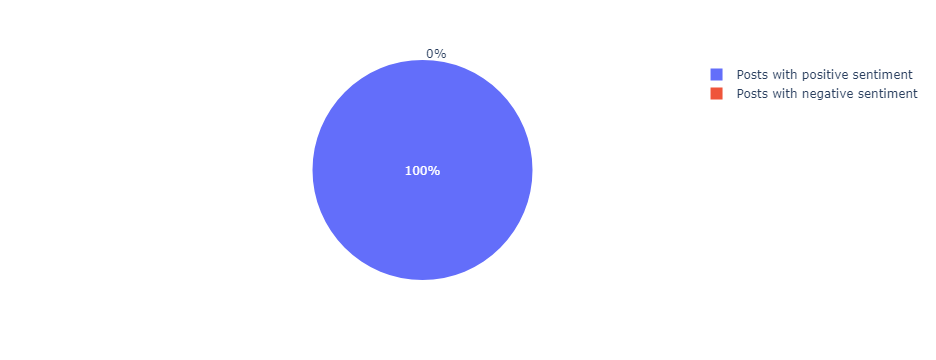

In [429]:
#score of negative and positive per post

labels = ['Posts with positive sentiment', 'Posts with negative sentiment']
sizes = [top_num_esg_pos, top_num_esg_neg]
explode = (0, 0) 

fig = px.pie(values=sizes, names=labels)
fig.show()

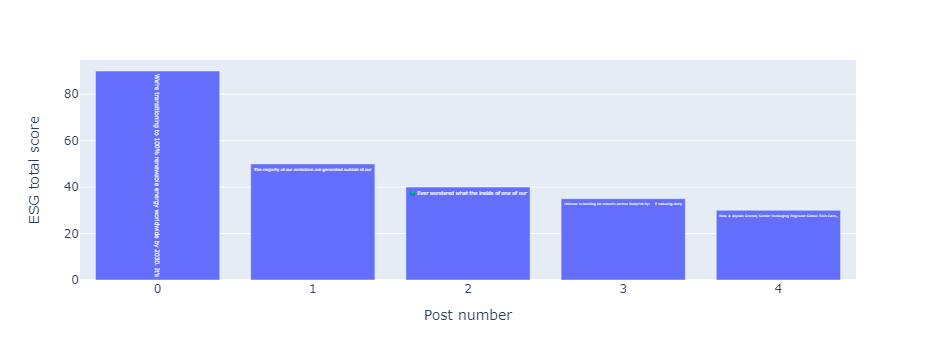

In [465]:
fig = px.bar(sorted_by, x='Post number', y='ESG total score',text="Short text")
fig.show()

In [466]:
fig = px.bar(sorted_by, x='Post number', y='ESG tot',text="Short text")
fig.show()

ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['level_0', 'index', 'urn', 'ts', 'company', 'numLikes', 'numComments', 'text', 'Environment', 'Positive', 'Climate Impact', 'Biodiversity and Environmental Footprint', 'Negative', 'Waste and Emissions Management ', 'Social', 'Human Capital ', 'Environmental Opportunities ', 'Waste and Emission Management', 'Diversity and Inclusion', 'Workplace and Product Safety', 'Environmental Crime', 'Governance', 'Legal Compliance', 'Business Ethics and Transparency', 'Product Stewardship', 'Environmental subcategories', 'Social subcategories', 'Governance subcategories', 'ESG total score', 'post_number', 'Post number', 'Short_text', 'Short text'] but received: Environmental

<AxesSubplot:xlabel='Category', ylabel='Counts'>

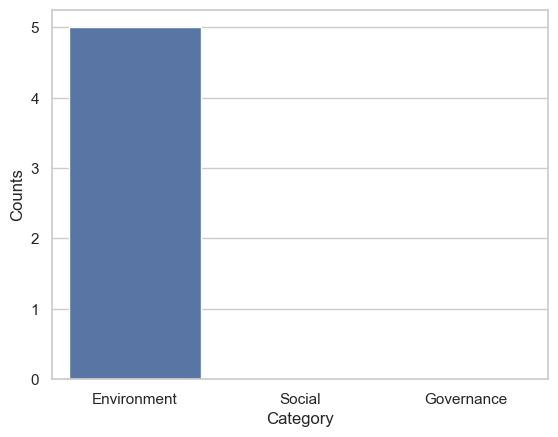

In [419]:
sns.barplot(data=top_cat_counts_df, x='Category', y='Counts')

<AxesSubplot:xlabel='Category', ylabel='Scores Sum'>

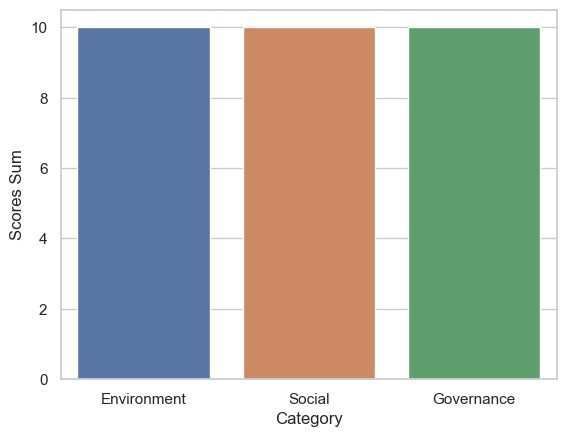

In [420]:
sns.barplot(data=top_cat_scores_df, x='Category', y='Scores Sum')

<AxesSubplot:xlabel='Counts', ylabel='Category'>

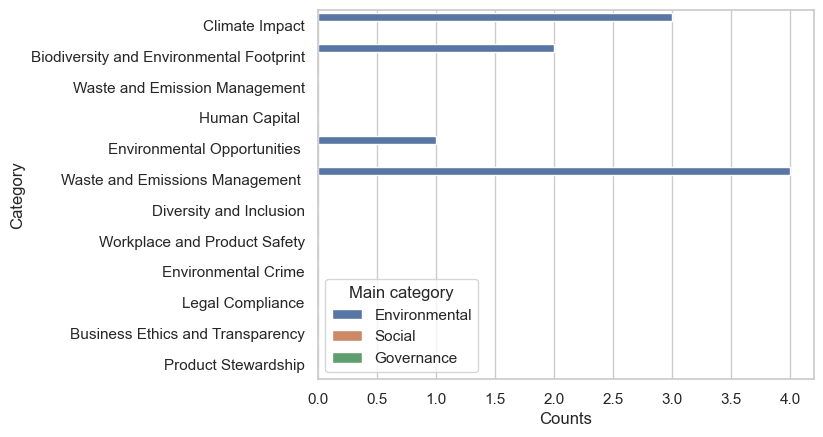

In [421]:
sns.barplot(data=top_subcat_counts_df, x='Counts', y='Category', orient='h', hue = 'Main category')

<AxesSubplot:xlabel='Scores Sum', ylabel='Category'>

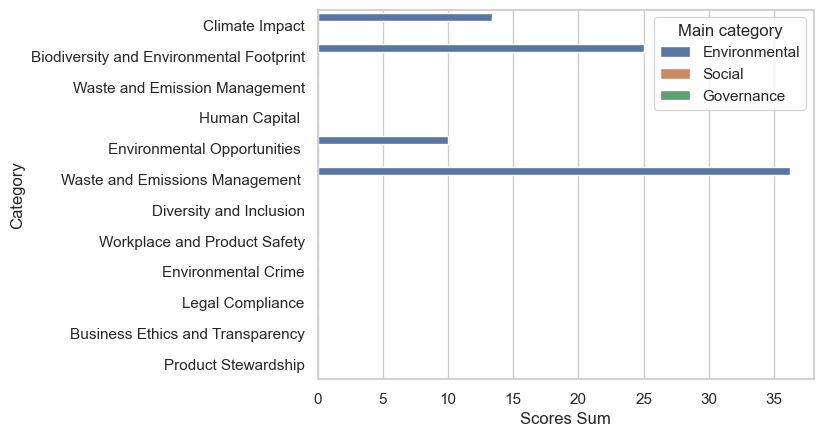

In [425]:
sns.barplot(data=top_subcat_scores_df, x='Scores Sum', y='Category', orient='h', hue = 'Main category')

<AxesSubplot:xlabel='Scores Sum', ylabel='Category'>

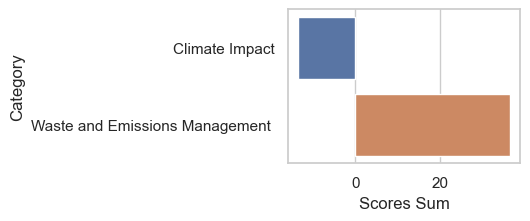

In [426]:
# choose two main categories
top_subcategory_1 = 'Climate Impact'
top_subcategory_2 = 'Waste and Emissions Management '
top_subcategory_1_score = dict()
top_subcategory_2_score = dict()

# convert one of them to negative
top_subcategory_1_score[top_subcategory_1] = top_subcat_scores_df[top_subcat_scores_df['Category']==top_subcategory_1]['Scores Sum'].values[0]*-1
top_subcategory_2_score[top_subcategory_2] = top_subcat_scores_df[top_subcat_scores_df['Category']==top_subcategory_2]['Scores Sum'].values[0]

top_subcategory_1_score.update(top_subcategory_2_score)
# make df
top_df_subcategories_1_2 = pd.DataFrame({'Category': list(top_subcategory_1_score.keys()), 'Scores Sum': list(top_subcategory_1_score.values())})

# plot
sns.set_theme(style="whitegrid")
fig, ax = pyplot.subplots(figsize=(3,2))
sns.barplot(data=top_df_subcategories_1_2, x='Scores Sum', y='Category', orient='h')



In [279]:
#show text, likes, etc
hashtags = []
for i in range(len(sorted_by)):
    print('Text for post number {} is: {}'.format(i+1,sorted_by.loc[i,'text']))
    print('\n')
    print('It has {} likes and {} comments'.format(sorted_by.loc[i,'numLikes'],sorted_by.loc[i,'numComments']))
    print('\n')
    
    hashtags.append(extract_hashtags(sorted_by.loc[i,'text']))
print("All hashtags: {}.".format(hashtags))

Text for post number 1 is: We’re proud to have won the Market Trailblazer category at The Climate Group RE100 Leadership Awards for our transition to renewable electricity. 

Renewable energy is a win–win for business and the planet. That’s why we’re partnering with others to accelerate the clean energy transition and make progress on our goal of 100% renewable energy for electricity and heat worldwide by 2030.    

🔗 Read more about our work here: https://lnkd.in/g3sTg3tv

#ClimateWeekNYC #RE100Awards 


It has 463 likes and 67 comments


Text for post number 2 is: We’re nearing the end of our logo journey with one more part remaining! 

Each symbol in our U expresses a fundamental aspect of our company and what we are doing to make positive change in the world.

Heart: A symbol of love, care and health. It represents our commitment to helping people take small everyday actions to improve their health and wellbeing.

Transformation: A symbol of positive change or transformation. Our c

**I have to fix this. These plots say nothing yet**

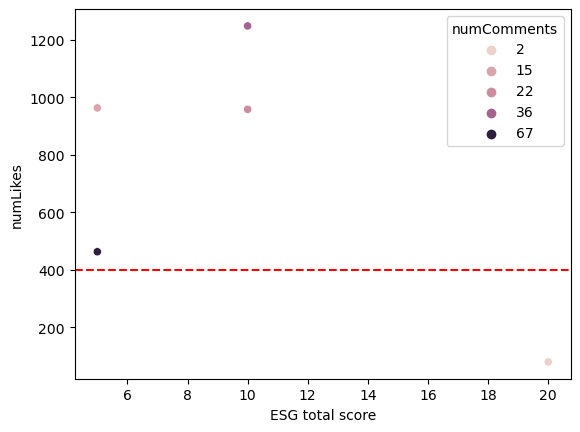

In [280]:
graph =sns.scatterplot(data=sorted_by,x='ESG total score', y = 'numLikes', hue='numComments')
graph.axhline(avg_likes,color='r', linestyle='--')

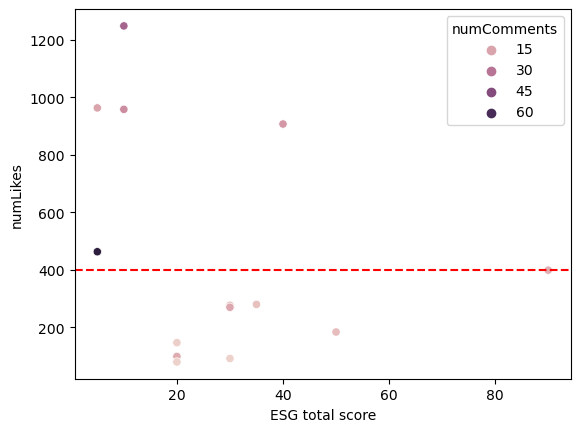

In [281]:
#maybe interesting for some companies with lots of posts

graph =sns.scatterplot(data=data,x='ESG total score', y = 'numLikes', hue='numComments')
graph.axhline(avg_likes,color='r', linestyle='--')

# Overall comment analysis

In [358]:
# get data
data_wcomm = pd.read_csv('../Data/comments_sentiment.csv')
print(len(data_wcomm))
data_wcomm.head()

25441


,comment_urn,post_urn,ts,company,author,numLikes,lang,text,sentiment
0,6860192036683964416,6859209515330523136,2021-10-30 12:33:57,antheminc,327710457,0,English,I absolutely am so proud that Anthem was a par...,25.29
1,6860771151203901440,6860251458462371840,2021-11-01 02:55:09,antheminc,807126556,0,English,Ru guys hiring any prn rns or part time remote...,-8.80
2,6861354258130976768,6861331347613597697,2021-11-02 17:32:12,antheminc,892370021,5,English,"Interesting findings. Re: mental health, our s...",-2.70
3,6861443225123647488,6861331347613597697,2021-11-02 23:25:44,antheminc,39790332,7,English,"This is a must read for everyone, regardless o...",3.59
4,6861785291519275008,6861331347613597697,2021-11-03 22:04:59,antheminc,807126556,0,English,Any part time remote or prn for rns,-29.39


In [ ]:
#run once we have the comments with sentiment

final_df_sentiment = data_wcomm.loc[data_wcomm['company'] == option].copy()

#merge with dataframe we have been using before 
final_df = data.merge(final_df_sentiment, how='outter', on='urn')
final_df = final_df.drop_duplicates()

#top 5 based on ESG total score and  highest total sentiment
final_df_top_ESG = final_df.sort_values('ESG total score',ascending=False)[0:4]

#incorporate these two in the dataframe
sum_sentiment_per_post = final_df.groupby('urn')['Sentiment'].sum()
mean_sentiment_per_post = final_df.groupby('urn')['Sentiment'].mean()

#sentiment total score same to sum_sentiment_per_post
final_df_top_sentiment = final_df.sort_values('sentiment total score',ascending=False)[0:4]

## Scatterplots

In [275]:
# print posts with post numbers


In [ ]:
#this is the idea, need to look at the data first

sns.scatterplot(data=final_df_top_ESG,x='ESG total score', y='Sentiment mean', hue='Post number')


In [ ]:
#this is the idea, need to look at the data first

sns.scatterplot(data=final_df_top_sentiment,x='ESG total score', y='Sentiment mean', hue='Post number')

## Distribution

In [ ]:
#distribution of comments for top 5 highest ESG total score

fig, ax = pyplot.subplots(figsize=(8,2))
sns.boxplot(data=final_df_top_ESG, x='Sentiment',hue='Post number').set(title='distribution of comments for top 5 posts with the highest ESG total score')

In [ ]:
#distribution of comments for top 5 highest Environmental score 


In [ ]:
#distribution of comments for top 5 highest Social score


In [ ]:
#distribution of comments for top 5 highest Governance score


In [ ]:
#distribution of comments for all posts
sns.boxplot(data=final_df, x='Sentiment',hue='Post number').set(title='distribution of comments for all posts by a company')

## Highest sentiment

In [ ]:
# print posts with post numbers (and ESG total score) + comments (sum)

In [ ]:
#barplot of comments with highest sentiment negative 
sns.barplot(data=final_df_top_sentiment, x='Post number', y='sentiment_total_negative_score')

In [ ]:
#barplot of comments with highest sentiment positive
sns.barplot(data=final_df_top_sentiment, x='Post number', y='sentiment_total_positive_score')